In [13]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import matplotlib.pyplot as plt
import random
import gym
from gym import spaces

from sklearn.preprocessing import LabelEncoder

In [18]:
import chardet
# 파일의 인코딩 감지
with open('../Reinforcement-learning-project/강화학습을 위한 개인별 선호 음식 데이터 수집.csv', 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']
encoding
# C:\Users\gsuhy\OneDrive\Documents\GitHub\Reinforcement-learning-project\강화학습을 위한 개인별 선호 음식 데이터 수집.csv

'EUC-KR'

In [20]:
data = pd.read_csv("../Reinforcement-learning-project/강화학습을 위한 개인별 선호 음식 데이터 수집.csv", encoding='EUC-KR')
data

,응답일시,참여자,"오늘 기분을 골라주세요. 1점 최악, 10점 최고(*)",현재의 날씨를 골라주세요.(*),"자신이 느끼는 현재의 온도를 골라주세요. 1점 추움, 10점 더움(*)",시간과 관계없이 현재 자신이 느끼는 식사 시간대를 선택해주세요.(*),함께 밥을 먹을 인원수를 입력해주세요.(*),성별을 골라주세요.(*),"나이대를 입력해주세요. (19살 -> 1, 20살 -> 2)(*)","현재의 날씨, 기분, 온도 그리고 인원수를 포함하여 먹고싶거나 먹기로 한 메뉴를 입력해주세요. (띄어쓰기X)(*)",기프티콘 지급을 위한 연락처를 입력해주세요. (필수 X)
0,2024-05-21 15:38:15,1,4,맑음,10,저녁(석식),2명,남자,2,제육볶음,1.040628e+09
1,2024-05-21 15:38:51,2,8,맑음,10,점심(중식),4명,여자,2,마라탕,1.032130e+09
2,2024-05-21 15:41:52,3,6,맑음,5,점심(중식),1명,여자,2,떡볶이,1.075212e+09
3,2024-05-21 15:42:51,4,3,맑음,3,저녁(석식),2명,여자,2,닭볶음탕,1.050636e+09
4,2024-05-21 15:44:22,5,10,맑음,5,점심(중식),4명,여자,5,등심스테시크피자치즈스파게티,1.035316e+09
...,...,...,...,...,...,...,...,...,...,...,...
157,2024-05-27 16:37:01,158,3,맑음,5,저녁(석식),1명,여자,2,돼지국밥,1.023155e+09
158,2024-05-27 17:09:58,159,9,맑음,6,저녁(석식),1명,여자,2,파스타,1.094917e+09
159,2024-05-27 17:40:27,160,10,구름 (해O 구름O),7,점심(중식),2명,남자,2,치킨,NaN
160,2024-05-27 19:32:52,161,8,맑음,7,저녁(석식),3명,남자,1,백반,1.059508e+09


In [21]:
data.columns

Index(['응답일시', '참여자', '오늘 기분을 골라주세요. 1점 최악, 10점 최고(*)', '현재의 날씨를 골라주세요.(*)',
       '자신이 느끼는 현재의 온도를 골라주세요. 1점 추움, 10점 더움(*)',
       '시간과 관계없이 현재 자신이 느끼는 식사 시간대를 선택해주세요.(*)', '함께 밥을 먹을 인원수를 입력해주세요.(*)',
       '성별을 골라주세요.(*)', '나이대를 입력해주세요. (19살 -> 1, 20살 -> 2)(*)',
       '현재의 날씨, 기분, 온도 그리고 인원수를 포함하여 먹고싶거나 먹기로 한 메뉴를 입력해주세요. (띄어쓰기X)(*)',
       '기프티콘 지급을 위한 연락처를 입력해주세요. (필수 X)'],
      dtype='object')

In [22]:
del data['응답일시']
del data['참여자']
del data['나이대를 입력해주세요. (19살 -> 1, 20살 -> 2)(*)']
del data['기프티콘 지급을 위한 연락처를 입력해주세요. (필수 X)']
data

,"오늘 기분을 골라주세요. 1점 최악, 10점 최고(*)",현재의 날씨를 골라주세요.(*),"자신이 느끼는 현재의 온도를 골라주세요. 1점 추움, 10점 더움(*)",시간과 관계없이 현재 자신이 느끼는 식사 시간대를 선택해주세요.(*),함께 밥을 먹을 인원수를 입력해주세요.(*),성별을 골라주세요.(*),"현재의 날씨, 기분, 온도 그리고 인원수를 포함하여 먹고싶거나 먹기로 한 메뉴를 입력해주세요. (띄어쓰기X)(*)"
0,4,맑음,10,저녁(석식),2명,남자,제육볶음
1,8,맑음,10,점심(중식),4명,여자,마라탕
2,6,맑음,5,점심(중식),1명,여자,떡볶이
3,3,맑음,3,저녁(석식),2명,여자,닭볶음탕
4,10,맑음,5,점심(중식),4명,여자,등심스테시크피자치즈스파게티
...,...,...,...,...,...,...,...
157,3,맑음,5,저녁(석식),1명,여자,돼지국밥
158,9,맑음,6,저녁(석식),1명,여자,파스타
159,10,구름 (해O 구름O),7,점심(중식),2명,남자,치킨
160,8,맑음,7,저녁(석식),3명,남자,백반


In [23]:
menu_list = data['현재의 날씨, 기분, 온도 그리고 인원수를 포함하여 먹고싶거나 먹기로 한 메뉴를 입력해주세요. (띄어쓰기X)(*)'].unique()
menu_list

array(['제육볶음', '마라탕', '떡볶이', '닭볶음탕', '등심스테시크피자치즈스파게티', '항정살덮밥', '족발',
       '맑음882돈까스', '삼겹살', '파스타', '하와이안피자', '크림파스타', '피자', '김치찌개', '불고기피자',
       '회', '덮밥', '타코야끼', '닭강정, 야끼소바', '초밥', '짜장면', '고구마피자', '제육덮밥', '치킨',
       '자장면', '소곱창', '바나나 한개', '밥버거', '냉면', '고기', '낙곱새', '고등어회', '봉구스밥버거',
       '맑음, 좋음, 26도, 8명?, 닭발', '김치전, 돼지고기, 치킨, 페퍼로니피자, 닭갈비', '1명 닭꼬치',
       '닭강정',
       '오늘 날씨가 좋아서 먹고 싶었던 치킨을 친구랑 뚝섬에 가서 맥주와 함께 먹기로 했다. 벌레가 없었으면 좋겠고 덜 더웠으면 좋겠다..',
       '마라탕, 사케동, 떡볶이, 닭우동, 돼지고기김치찜, 청국장, 순두부찌개', '무뼈국물닭발', '간장치킨',
       '요거트아이스크림', '분짜', '샌드위치', '소고기무국', '돼지갈비', '짜파게티', '곱창', '양꼬치',
       '라면', '열무국수', '양송이수프닭꼬치마늘빵망고주스', '소고기덮밥', '해장국', '순대국밥', '선지해장국',
       '맑음기분최상27도4명', '삼겹살, 돼지갈비', '크림파스타 피자 치킨 초밥 냉소바 부대찌개 목살스테이크',
       '새우초밥', '비빔국수', '불닭게티', '삼겹살, 된장찌개, 부추무침, 쌀밥', '고구마치즈돈가스',
       '투움바파스타', '양념치킨', '닭갈비', '대창', '솥밥', '연어회', '김치전',
       '파전, 막걸리, 소주, 육회', '칼국수', '전', '로제마라샹궈', '두부김치', '강된장보리밥',
       '한식(백반)', '닭발', '바게트', '족발과막국수', '치킨,닭발', '포케',
       '날씨

In [24]:
data.columns = ['feeling','weather','temp','time','num_people','gender','menu']
data.columns

Index(['feeling', 'weather', 'temp', 'time', 'num_people', 'gender', 'menu'], dtype='object')

In [25]:
data

,feeling,weather,temp,time,num_people,gender,menu
0,4,맑음,10,저녁(석식),2명,남자,제육볶음
1,8,맑음,10,점심(중식),4명,여자,마라탕
2,6,맑음,5,점심(중식),1명,여자,떡볶이
3,3,맑음,3,저녁(석식),2명,여자,닭볶음탕
4,10,맑음,5,점심(중식),4명,여자,등심스테시크피자치즈스파게티
...,...,...,...,...,...,...,...
157,3,맑음,5,저녁(석식),1명,여자,돼지국밥
158,9,맑음,6,저녁(석식),1명,여자,파스타
159,10,구름 (해O 구름O),7,점심(중식),2명,남자,치킨
160,8,맑음,7,저녁(석식),3명,남자,백반


In [26]:
menu_list = data['menu']

In [27]:
label_encoder = LabelEncoder()

# 각 범주형 컬럼에 Label Encoding 적용
categorical_columns = ['weather', 'time', 'gender', 'menu']  # 범주형 컬럼 목록
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data['num_people'] = data['num_people'].str.extract('(\d+)').astype(int)
# 변환된 데이터 확인
print(data.head())

   feeling  weather  temp  time  num_people  gender  menu
0        4        3    10     2           2       0    71
1        8        3    10     3           4       1    31
2        6        3     5     3           1       1    26
3        3        3     3     2           2       1    19
4       10        3     5     3           4       1    25


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gsuhy\AppData\Local\Temp\ipykernel_8264\138679662.py:7: SyntaxWarning: invalid escape sequence '\d'
  data['num_people'] = data['num_people'].str.extract('(\d+)').astype(int)


In [28]:
menu_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("메뉴 이름과 매핑된 정수:")
print(menu_mapping)

메뉴 이름과 매핑된 정수:
{'1명 닭꼬치': np.int64(0), '간장치킨': np.int64(1), '강된장보리밥': np.int64(2), '고구마치즈돈가스': np.int64(3), '고구마피자': np.int64(4), '고기': np.int64(5), '고등어회': np.int64(6), '곱창': np.int64(7), '국밥': np.int64(8), '김치전': np.int64(9), '김치전, 돼지고기, 치킨, 페퍼로니피자, 닭갈비': np.int64(10), '김치찌개': np.int64(11), '낙곱새': np.int64(12), '날씨는 흐리지만 기분이 좋아요! 비가 와서 친구랑 삼겹살 먹으려고요!': np.int64(13), '냉면': np.int64(14), '닭갈비': np.int64(15), '닭강정': np.int64(16), '닭강정, 야끼소바': np.int64(17), '닭발': np.int64(18), '닭볶음탕': np.int64(19), '대창': np.int64(20), '덮밥': np.int64(21), '돼지갈비': np.int64(22), '돼지국밥': np.int64(23), '두부김치': np.int64(24), '등심스테시크피자치즈스파게티': np.int64(25), '떡볶이': np.int64(26), '떡볶이, 멘보샤, 마라탕, 콩나물국밥, 육개장, 추어탕, 된장찌개, 양념치킨': np.int64(27), '라면': np.int64(28), '로제마라샹궈': np.int64(29), '마라로제엽기떡볶이': np.int64(30), '마라탕': np.int64(31), '마라탕, 사케동, 떡볶이, 닭우동, 돼지고기김치찜, 청국장, 순두부찌개': np.int64(32), '맑음, 좋음, 26도, 8명?, 닭발': np.int64(33), '맑음882돈까스': np.int64(34), '맑음기분최상27도4명': np.int64(35), '무뼈국물닭발': np.int64(36), '바게트': np.int

In [29]:
data

,feeling,weather,temp,time,num_people,gender,menu
0,4,3,10,2,2,0,71
1,8,3,10,3,4,1,31
2,6,3,5,3,1,1,26
3,3,3,3,2,2,1,19
4,10,3,5,3,4,1,25
...,...,...,...,...,...,...,...
157,3,3,5,2,1,1,23
158,9,3,6,2,1,1,85
159,10,0,7,3,2,0,77
160,8,3,7,2,3,0,40


In [30]:
breakfast_data = data[data['time'] == 0]
lunch_data = data[data['time'] == 1]
dinner_data = data[data['time'] == 2]
Midnight_data = data[data['time'] == 3]

In [31]:
d_episodes = []
for i in range(max(len(breakfast_data), len(lunch_data), len(dinner_data), len(Midnight_data))):
    episode = [
        breakfast_data.iloc[i % len(breakfast_data)].tolist(),
        lunch_data.iloc[i % len(lunch_data)].tolist(),
        dinner_data.iloc[i % len(dinner_data)].tolist(),
        Midnight_data.iloc[i % len(Midnight_data)].tolist()
    ]
    d_episodes.append(episode)

In [32]:
d_episodes[0]

[[7, 3, 5, 0, 4, 0, 75],
 [6, 3, 6, 1, 1, 0, 83],
 [4, 3, 10, 2, 2, 0, 71],
 [8, 3, 10, 3, 4, 1, 31]]

In [33]:
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

In [34]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)

In [35]:
import random
import torch

class DQNAgent:
    def __init__(self, state_dim, action_dim, replay_buffer):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.replay_buffer = replay_buffer
        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.0005)
        self.epsilon = 1.0  # 초기 탐색 확률
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01

    def select_action(self, state):
        if random.random() < self.epsilon:
            action = random.randrange(self.action_dim)  # 무작위 행동 선택
        else:
            state = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                q_values = self.model(state)
            action = q_values.max(1)[1].item()  # 최대 Q 값을 가진 행동 선택
        return action

    def update_model(self, batch_size):
        if len(self.replay_buffer) < batch_size:
            return
        batch = self.replay_buffer.sample(batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states)
        next_states = torch.FloatTensor(next_states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)

        current_q_values = self.model(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        max_next_q_values = self.model(next_states).max(1)[0]
        expected_q_values = rewards + 0.99 * max_next_q_values * (1 - dones)

        loss = nn.MSELoss()(current_q_values, expected_q_values.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # 탐색 확률 감소
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [36]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class DQNAgent:
    def __init__(self, state_dim, action_dim, replay_buffer):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.replay_buffer = replay_buffer
        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.0005)
        self.epsilon = 1.0  # 초기 탐색 확률
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01

    def select_action(self, state):
        if random.random() < self.epsilon:
            action = random.randrange(self.action_dim)  # 무작위 행동 선택
        else:
            state = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                q_values = self.model(state)
            action = q_values.max(1)[1].item()  # 최대 Q 값을 가진 행동 선택
        return action

    def update_model(self, batch_size):
        if len(self.replay_buffer) < batch_size:
            return
        batch = self.replay_buffer.sample(batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states)
        next_states = torch.FloatTensor(next_states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)

        current_q_values = self.model(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        max_next_q_values = self.model(next_states).max(1)[0]
        expected_q_values = rewards + (1 - dones) * 0.99 * max_next_q_values

        loss = nn.MSELoss()(current_q_values, expected_q_values.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # 탐색 확률 감소
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)

In [37]:
state_dim = 6  # 상태 차원 (예시)
action_dim = 100  # 행동 차원 (예시, 추천할 메뉴 수)
replay_buffer = ReplayBuffer(10000)
agent = DQNAgent(state_dim, action_dim, replay_buffer)
batch_size = 16

# 가정: `env`는 학습 환경으로, 초기 상태를 반환하는 `reset()`과
# 주어진 행동에 따라 다음 상태, 보상, 종료 여부를 반환하는 `step(action)` 메소드를 제공
# 또한 `target_menus`는 각 상태에 따른 정답 메뉴의 리스트라고 가정

episodes = 10000
reward_arr = []
for episode in range(episodes):
    day_data = d_episodes[episode%len(d_episodes)]
    total_reward = 0

    for i in range(len(day_data) - 1):
        state = day_data[i][:-1]
        next_state = day_data[i + 1][:-1]
        target_menu = day_data[i][-1]

        action = agent.select_action(state)
        reward = 1 if action == target_menu else -1
        done = (i == len(day_data) - 2)

        agent.replay_buffer.push(state, action, reward, next_state, done)
        agent.update_model(batch_size)

        state = next_state
        total_reward += reward
    reward_arr.append(total_reward)
    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\gsuhy\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\gsuhy\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\gsuhy\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

Episode 0, Total Reward: -3
Episode 100, Total Reward: -3
Episode 200, Total Reward: -3
Episode 300, Total Reward: -3
Episode 400, Total Reward: -1
Episode 500, Total Reward: 1
Episode 600, Total Reward: -1
Episode 700, Total Reward: -3
Episode 800, Total Reward: -1
Episode 900, Total Reward: 1
Episode 1000, Total Reward: -1
Episode 1100, Total Reward: -1
Episode 1200, Total Reward: -1
Episode 1300, Total Reward: -1
Episode 1400, Total Reward: -1
Episode 1500, Total Reward: -1
Episode 1600, Total Reward: -3
Episode 1700, Total Reward: 1
Episode 1800, Total Reward: -1
Episode 1900, Total Reward: -1
Episode 2000, Total Reward: 1
Episode 2100, Total Reward: -1
Episode 2200, Total Reward: -1
Episode 2300, Total Reward: 1
Episode 2400, Total Reward: 3
Episode 2500, Total Reward: -1
Episode 2600, Total Reward: -3
Episode 2700, Total Reward: 1
Episode 2800, Total Reward: 1
Episode 2900, Total Reward: -1
Episode 3000, Total Reward: 1
Episode 3100, Total Reward: -1
Episode 3200, Total Reward: 1

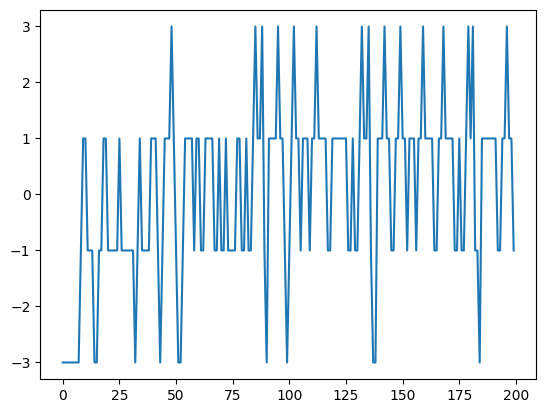

In [38]:
plt.plot(reward_arr[:10000:50])

In [39]:
## 체크포인트 ##

Episode 0, Total Reward: -3
Episode 100, Total Reward: -3
Episode 200, Total Reward: -3
Episode 300, Total Reward: -1
Episode 400, Total Reward: -3
Episode 500, Total Reward: -1
Episode 600, Total Reward: -1
Episode 700, Total Reward: -3
Episode 800, Total Reward: -1
Episode 900, Total Reward: -3
Episode 1000, Total Reward: -1
Episode 1100, Total Reward: -3
Episode 1200, Total Reward: -1
Episode 1300, Total Reward: -1
Episode 1400, Total Reward: -3
Episode 1500, Total Reward: 1
Episode 1600, Total Reward: -3
Episode 1700, Total Reward: -1
Episode 1800, Total Reward: -1
Episode 1900, Total Reward: -1
Episode 2000, Total Reward: -3
Episode 2100, Total Reward: -3
Episode 2200, Total Reward: -1
Episode 2300, Total Reward: -1
Episode 2400, Total Reward: 1
Episode 2500, Total Reward: -3
Episode 2600, Total Reward: -1
Episode 2700, Total Reward: -1
Episode 2800, Total Reward: -3
Episode 2900, Total Reward: 3
Episode 3000, Total Reward: 1
Episode 3100, Total Reward: -3
Episode 3200, Total Rewa

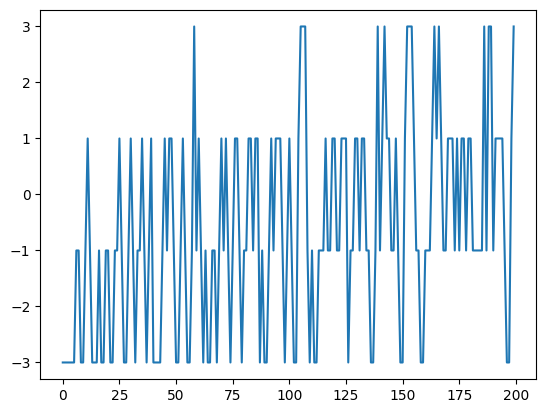

Checkpoint 1000: Accuracy = 20.57%
Checkpoint 2000: Accuracy = 29.08%
Checkpoint 3000: Accuracy = 33.33%
Checkpoint 4000: Accuracy = 35.11%
Checkpoint 5000: Accuracy = 40.78%
Checkpoint 6000: Accuracy = 45.74%
Checkpoint 7000: Accuracy = 47.16%
Checkpoint 8000: Accuracy = 53.90%
Checkpoint 9000: Accuracy = 54.96%


In [40]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import matplotlib.pyplot as plt

# DQN 모델 정의
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# DQNAgent 정의
class DQNAgent:
    def __init__(self, state_dim, action_dim, replay_buffer):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.replay_buffer = replay_buffer
        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.0005)
        self.epsilon = 1.0  # 초기 탐색 확률
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01

    def select_action(self, state):
        if random.random() < self.epsilon:
            action = random.randrange(self.action_dim)  # 무작위 행동 선택
        else:
            state = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                q_values = self.model(state)
            action = q_values.max(1)[1].item()  # 최대 Q 값을 가진 행동 선택
        return action

    def update_model(self, batch_size):
        if len(self.replay_buffer) < batch_size:
            return
        batch = self.replay_buffer.sample(batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states)
        next_states = torch.FloatTensor(next_states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)

        current_q_values = self.model(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        max_next_q_values = self.model(next_states).max(1)[0]
        expected_q_values = rewards + 0.99 * max_next_q_values * (1 - dones)

        loss = nn.MSELoss()(current_q_values, expected_q_values.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # 탐색 확률 감소
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# ReplayBuffer 정의
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)

# 데이터 준비
state_dim = 6  # 상태 차원
action_dim = 100  # 행동 차원 (예시)
replay_buffer = ReplayBuffer(10000)
agent = DQNAgent(state_dim, action_dim, replay_buffer)
batch_size = 16

episodes = 10000
reward_arr = []
checkpoints = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

for episode in range(episodes):
    day_data = d_episodes[episode % len(d_episodes)]
    total_reward = 0

    for i in range(len(day_data) - 1):
        state = day_data[i][:-1]
        next_state = day_data[i + 1][:-1]
        target_menu = day_data[i][-1]

        action = agent.select_action(state)
        reward = 1 if action == target_menu else -1
        done = (i == len(day_data) - 2)

        agent.replay_buffer.push(state, action, reward, next_state, done)
        agent.update_model(batch_size)

        state = next_state
        total_reward += reward
    reward_arr.append(total_reward)

    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")

    if episode in checkpoints:
        # 모델 체크포인트 저장
        checkpoint_path = f'model_checkpoint_{episode}.pth'
        torch.save({
            'model_state_dict': agent.model.state_dict(),
            'optimizer_state_dict': agent.optimizer.state_dict(),
            'episode': episode,
            'total_reward': total_reward
        }, checkpoint_path)

# 학습 결과 플롯팅
plt.plot(reward_arr[:10000:50])
plt.show()

# 모델 체크포인트 로드 및 평가
evaluation_results = []

for checkpoint in checkpoints:
    checkpoint_path = f'model_checkpoint_{checkpoint}.pth'
    checkpoint_data = torch.load(checkpoint_path)

    agent.model.load_state_dict(checkpoint_data['model_state_dict'])
    agent.optimizer.load_state_dict(checkpoint_data['optimizer_state_dict'])
    agent.epsilon = 0.01  # 평가 시 탐색 확률을 최소화

    total_correct = 0
    total_samples = 0

    for day_data in d_episodes:
        for i in range(len(day_data) - 1):
            state = day_data[i][:-1]
            target_menu = day_data[i][-1]

            action = agent.select_action(state)
            if action == target_menu:
                total_correct += 1
            total_samples += 1

    accuracy = total_correct / total_samples
    evaluation_results.append((checkpoint, accuracy))

# 평가 결과 출력
for checkpoint, accuracy in evaluation_results:
    print(f"Checkpoint {checkpoint}: Accuracy = {accuracy * 100:.2f}%")